In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import utils
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay



In [34]:
df = pd.read_csv("combined_data_clean.csv")
df.head()

,FTHG,FTAG,HTHG,HTAG,HST,AST,B365H,B365A,BWH,BWA,...,MaxCA,AvgCH,AvgCA,AHCh,IWH,IWA,VCH,VCA,FTREncoded,FTR
0,-0.381231,-0.121387,0.410169,-0.691476,-0.260731,-0.764263,-0.632409,0.790150,-0.682781,0.797760,...,0.958909,-0.755015,1.115374,-1.219140,-0.238407,-0.27108,-0.258239,-0.267293,1,D
1,-0.381231,-0.121387,0.410169,-0.691476,-0.260731,-0.764263,-0.181811,-0.420159,-0.143598,-0.420752,...,-0.416052,-0.126615,-0.399860,0.062436,-0.238407,-0.27108,-0.258239,-0.267293,1,D
2,0.399242,-0.121387,-0.787181,0.715283,-0.260731,-0.764263,-0.363086,-0.153891,-0.340175,-0.204974,...,-0.117983,-0.333325,-0.101524,0.062436,-0.238407,-0.27108,-0.258239,-0.267293,2,H
3,0.399242,0.780346,0.410169,0.715283,0.139446,0.629421,0.051256,-0.509722,0.109144,-0.522295,...,-0.499382,0.129706,-0.505848,0.489628,-0.238407,-0.27108,-0.258239,-0.267293,1,D
4,-0.381231,-0.121387,-0.787181,0.715283,0.139446,0.164860,-0.440775,-0.057066,-0.469354,-0.001889,...,0.260211,-0.523499,0.314577,-0.364756,-0.238407,-0.27108,-0.258239,-0.267293,1,D


In [35]:
df.columns

Index(['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HST', 'AST', 'B365H', 'B365A', 'BWH',
       'BWA', 'PSH', 'PSA', 'WHH', 'WHA', 'MaxH', 'MaxA', 'AvgH', 'AvgA',
       'AHh', 'B365CH', 'B365CA', 'BWCH', 'PSCH', 'PSCA', 'WHCH', 'MaxCH',
       'MaxCA', 'AvgCH', 'AvgCA', 'AHCh', 'IWH', 'IWA', 'VCH', 'VCA',
       'FTREncoded', 'FTR'],
      dtype='object')

In [36]:
betting_keywords = ['B365', 'BW', 'PS', 'WH', 'Max', 'Avg', 'VC', 'IW', 'AH']

df = df.drop(
    columns=[c for c in df.columns if any(k in c for k in betting_keywords)]
)

df.columns
df.head()

,FTHG,FTAG,HTHG,HTAG,HST,AST,FTREncoded,FTR
0,-0.381231,-0.121387,0.410169,-0.691476,-0.260731,-0.764263,1,D
1,-0.381231,-0.121387,0.410169,-0.691476,-0.260731,-0.764263,1,D
2,0.399242,-0.121387,-0.787181,0.715283,-0.260731,-0.764263,2,H
3,0.399242,0.780346,0.410169,0.715283,0.139446,0.629421,1,D
4,-0.381231,-0.121387,-0.787181,0.715283,0.139446,0.164860,1,D


In [37]:
rename_map = {
    'FTHG': 'Full Time Home Goals',
    'FTAG': 'Full Time Away Goals',
    'FTR' : 'Full Time Result',
    'HTHG': 'Half Time Home Goals',
    'HTAG': 'Half Time Away Goals',
    'HST' : 'Home Shots on Target',
    'AST' : 'Away Shots on Target'
}
df = df.rename(columns=rename_map)
df.columns



Index(['Full Time Home Goals', 'Full Time Away Goals', 'Half Time Home Goals',
       'Half Time Away Goals', 'Home Shots on Target', 'Away Shots on Target',
       'FTREncoded', 'Full Time Result'],
      dtype='object')

In [38]:

X = df[
    [
        'Half Time Home Goals',
        'Half Time Away Goals',
        'Home Shots on Target',
        'Away Shots on Target'
    ]
]
y = df['Full Time Result'].astype(str).str.strip().str.upper()
y = y.map({'H':0, 'D':1, 'A':2})
print(y.value_counts(dropna=False))
print("NaNs after mapping:", y.isna().sum())


Full Time Result
0    1736
2    1105
1    1022
Name: count, dtype: int64
NaNs after mapping: 0


In [39]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# scaler = StandardScaler()
# # after transformation mean = 0 , sd = 1.
# X_train = scaler.fit_transform(X_train)
# # transform using the same fit learned earlier.
# X_test = scaler.transform(X_test)


In [40]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {"alpha": 1 / np.logspace(-3, 6, 100)}

search = GridSearchCV(
    SGDClassifier(loss="hinge", random_state=42),
    param_grid,
    scoring="accuracy"
)

search.fit(X_train, y_train)
best_C = 1 / search.best_params_["alpha"]
print(best_C, search.best_score_)


2310.129700083163 0.6310679611650485


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

# 2. Setup Variables
C_current = 0.01
multiplier = 1.1
max_C_safety = 1_000_000

# TRACKING
best_test_acc = 0.0
best_train_acc = 0.0
best_C_found = C_current
history = []  # (C, train_acc, test_acc)

print(f"{'C Value':<15} | {'Alpha':<15} | {'Train Acc':<15} | {'Test Acc':<15}")
print("-" * 70)

# 3. The Robust Loop
while C_current < max_C_safety:
    current_alpha = 1.0 / C_current

    clf = SGDClassifier(loss="hinge", alpha=current_alpha, random_state=42)
    clf.fit(X_train, y_train)

    # Train accuracy
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)

    # Test accuracy
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)

    history.append((C_current, train_acc, test_acc))

    print(f"{C_current:<15.4f} | {current_alpha:<15.6f} | {train_acc:<15.4f} | {test_acc:<15.4f}")

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_train_acc = train_acc
        best_C_found = C_current

    elif C_current > (best_C_found * 100):
        print(f"\nStop Triggered: 100x past best C ({best_C_found}) with no improvement.")
        break

    C_current *= multiplier

print("-" * 70)
print(f"Best C: {best_C_found}")
print(f"Best Test Accuracy: {best_test_acc}")
print(f"Corresponding Train Accuracy: {best_train_acc}")


C Value         | Alpha           | Train Acc       | Test Acc       
----------------------------------------------------------------------
0.0100          | 100.000000      | 0.4841          | 0.4670         
0.0110          | 90.909091       | 0.4605          | 0.4476         
0.0121          | 82.644628       | 0.4605          | 0.4476         
0.0133          | 75.131480       | 0.4605          | 0.4476         
0.0146          | 68.301346       | 0.4605          | 0.4476         
0.0161          | 62.092132       | 0.4599          | 0.4463         
0.0177          | 56.447393       | 0.4599          | 0.4463         
0.0195          | 51.315812       | 0.4599          | 0.4463         
0.0214          | 46.650738       | 0.4599          | 0.4450         
0.0236          | 42.409762       | 0.4599          | 0.4450         
0.0259          | 38.554329       | 0.4599          | 0.4450         
0.0285          | 35.049390       | 0.4599          | 0.4437         
0.0314          | 3

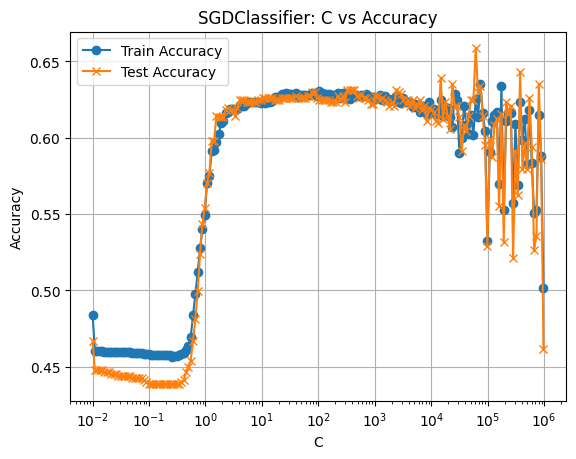

In [42]:
import matplotlib.pyplot as plt

# Unpack history
C_values, train_accs, test_accs = zip(*history)

plt.figure()
plt.plot(C_values, train_accs, marker='o', label='Train Accuracy')
plt.plot(C_values, test_accs, marker='x', label='Test Accuracy')
plt.xscale('log')  # C grows multiplicatively → log scale
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SGDClassifier: C vs Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [43]:

# Grid search over multiple kernels and C values
param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'kernel': ['poly'],   'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    {'kernel': ['rbf'],    'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
    {'kernel': ['sigmoid'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}
]

grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
svm = grid_search.best_estimator_

print("Best params:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


Best params: {'C': 100, 'kernel': 'linear'}
Best CV accuracy: 0.644336569579288


In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_small_c = SVC(C=0.0001, kernel='rbf')
svm_big_c = SVC(C=6000, kernel='rbf')

svm_small_c.fit(X_train, y_train)
svm_big_c.fit(X_train, y_train)

# --- Evaluation ---

y_train_pred_small = svm_small_c.predict(X_train)
y_test_pred_small  = svm_small_c.predict(X_test)

print("Small C train acc:", accuracy_score(y_train, y_train_pred_small))
print("Small C test acc:",  accuracy_score(y_test,  y_test_pred_small))

y_train_pred_big = svm_big_c.predict(X_train)
y_test_pred_big  = svm_big_c.predict(X_test)

print("Big C train acc:", accuracy_score(y_train, y_train_pred_big))
print("Big C test acc:",  accuracy_score(y_test,  y_test_pred_big))

Small C train acc: 0.4527508090614887
Small C test acc: 0.4359637774902975
Big C train acc: 0.6854368932038835
Big C test acc: 0.6196636481241915


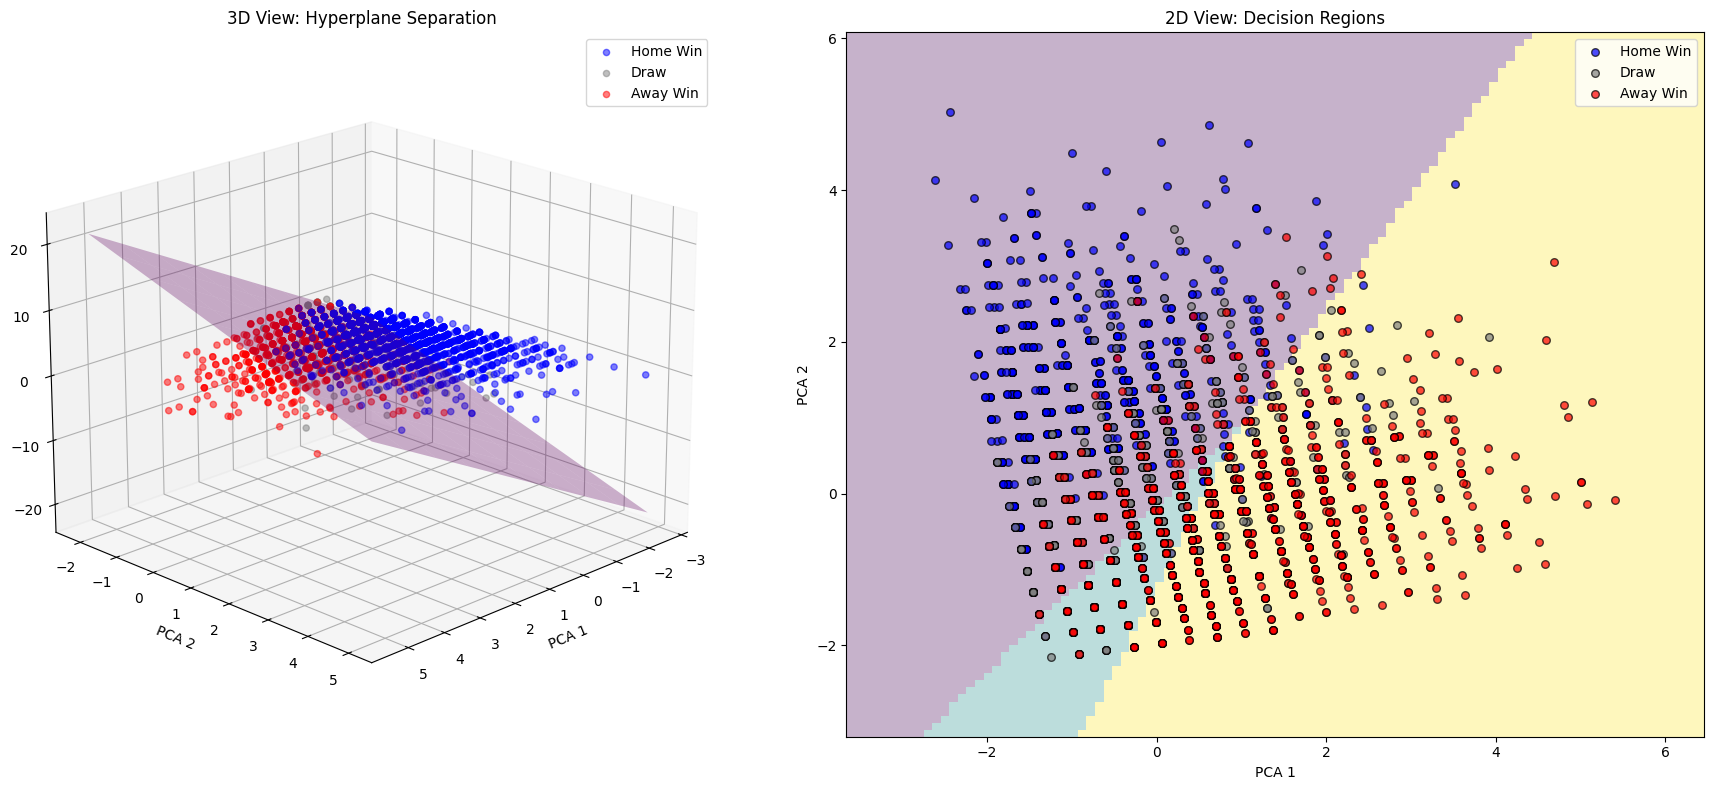

In [45]:



features = ['Half Time Home Goals', 'Half Time Away Goals', 
            'Home Shots on Target', 'Away Shots on Target']
X = df[features]
y = df['Full Time Result'].astype(str).str.strip().str.upper().map({'H':0, 'D':1, 'A':2})

combined = pd.concat([X, y], axis=1).dropna()
X_clean = combined[features]
y_clean = combined['Full Time Result']

# 2. SCALE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

fig = plt.figure(figsize=(18, 8))

# ------------------------------------------
# VIEW 1: 3D Visualization (Original)
# ------------------------------------------
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# PCA to 3D
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X_scaled)

# Train 3D SVM
svm_3d = SVC(kernel='linear', C=100.0)
svm_3d.fit(X_3d, y_clean)

# Calculate Hyperplane (Home vs Away -> Index 1 usually)
w = svm_3d.coef_[1] 
b = svm_3d.intercept_[1]
xx, yy = np.meshgrid(
    np.linspace(X_3d[:, 0].min(), X_3d[:, 0].max(), 10),
    np.linspace(X_3d[:, 1].min(), X_3d[:, 1].max(), 10)
)
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

# Plot 3D
colors = {0: 'blue', 1: 'gray', 2: 'red'}
labels_map = {0: 'Home Win', 1: 'Draw', 2: 'Away Win'}

for label_val in [0, 1, 2]:
    mask = (y_clean.values == label_val)
    if mask.sum() > 0:
        ax1.scatter(
            X_3d[mask, 0], X_3d[mask, 1], X_3d[mask, 2],
            c=colors[label_val], label=labels_map[label_val], alpha=0.5
        )
ax1.plot_surface(xx, yy, zz, alpha=0.3, color='purple')
ax1.set_title('3D View: Hyperplane Separation')
ax1.set_xlabel('PCA 1'); ax1.set_ylabel('PCA 2'); ax1.set_zlabel('PCA 3')
ax1.view_init(elev=20, azim=45)
ax1.legend()

# ------------------------------------------
# VIEW 2: 2D Visualization (New Request)
# ------------------------------------------
ax2 = fig.add_subplot(1, 2, 2)

# PCA to 2D
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Train 2D SVM (Needed to draw the correct boundary in 2D space)
svm_2d = SVC(kernel='linear', C=100.0)
svm_2d.fit(X_2d, y_clean)

# Plot Decision Regions
DecisionBoundaryDisplay.from_estimator(
    svm_2d,
    X_2d,
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.3,
    ax=ax2,
    response_method="predict" # Shows the "winning" class area
)

# Plot Scatter Points
for label_val in [0, 1, 2]:
    mask = (y_clean.values == label_val)
    ax2.scatter(
        X_2d[mask, 0], X_2d[mask, 1],
        c=colors[label_val], label=labels_map[label_val],
        edgecolor='k', s=30, alpha=0.7
    )

ax2.set_title('2D View: Decision Regions')
ax2.set_xlabel('PCA 1'); ax2.set_ylabel('PCA 2')
ax2.legend()

plt.tight_layout()
plt.show()

In [46]:
from sklearn.metrics import classification_report

y_pred_train = svm.predict(X_train)

report = classification_report(
    y_train,
    y_pred_train,
    target_names=['Away Win', 'Draw', 'Home Win'],
    output_dict=True
)

print("SVM Train Accuracy:", round(accuracy_score(y_train, y_pred_train), 2))
print()
for cls in ['Away Win', 'Draw', 'Home Win']:
    metrics = report[cls]
    print(f"{cls:<10} precision: {metrics['precision']:.2f}, "
          f"recall: {metrics['recall']:.2f}, "
          f"f1-score: {metrics['f1-score']:.2f}, "
          f"support: {int(metrics['support'])}")


SVM Train Accuracy: 0.65

Away Win   precision: 0.71, recall: 0.81, f1-score: 0.76, support: 1399
Draw       precision: 0.46, recall: 0.33, f1-score: 0.39, support: 822
Home Win   precision: 0.66, recall: 0.68, f1-score: 0.67, support: 869


In [47]:
import joblib
joblib.dump(svm, "svm.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']